In [3]:
import os
import fnmatch


def filecount(dir_path):
    co= len(fnmatch.filter(os.listdir(dir_path), '*.*'))
    print(co)
    return co

dir1=r'C:\Users\hp\ImgClass_Fashion\image-classification-pants\train'
count_train=filecount(dir1)

dir2=r'C:\Users\hp\ImgClass_Fashion\image-classification-pants\test'
count_test=filecount(dir2)

18391
5751


In [4]:
import pandas as pd
data=pd.read_csv(r'C:\Users\hp\ImgClass_Fashion\image-classification-pants\train.csv')

data.label =data.label.astype('int64')
f=data['label'].value_counts()

print(f)
print(type(f))

1    5384
2    4084
3    2008
4    1972
6    1925
5    1616
0    1402
Name: label, dtype: int64
<class 'pandas.core.series.Series'>


In [5]:
y=data.iloc[:,-1].values

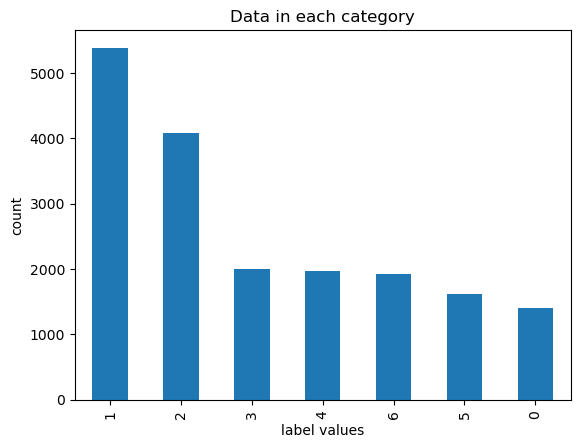

In [6]:
import matplotlib.pyplot as plt
data['label'].value_counts().plot(kind='bar')
plt.title('Data in each category')
plt.xlabel('label values')
plt.ylabel('count')
plt.show()

In [7]:
import cv2

def groupdata(path):
    x=[]
    for img in os.listdir(path):
        image_path=path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(32,32))
        x.append(img_arr)
    print(len(x))
    return x

x=groupdata(dir1)
x_unseen=groupdata(dir2)

18391
5751


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.333, random_state=42)

In [9]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

12266
6125
12266
6125


In [10]:
import numpy as np
unique_values, counts = np.unique(y_train, return_counts=True)

print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [0 1 2 3 4 5 6]
Counts: [ 937 3628 2750 1330 1301 1045 1275]


In [11]:
import numpy as np

from sklearn.utils.class_weight import compute_class_weight


class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

cla_w= [round(i, 2) for i in class_weights]
print(cla_w)

[1.87, 0.48, 0.64, 1.32, 1.35, 1.68, 1.37]


In [12]:
class_weights = {0: cla_w[0], 1:cla_w[1], 2:cla_w[2],3:cla_w[3],4:cla_w[4],5:cla_w[5],6:cla_w[6]}
print(class_weights)

{0: 1.87, 1: 0.48, 2: 0.64, 3: 1.32, 4: 1.35, 5: 1.68, 6: 1.37}


In [13]:
import numpy as np

x_train=np.array(x_train)
x_test=np.array(x_test)
x_unseen=np.array(x_unseen)

x_train=(x_train.astype('float32'))/255.0
x_test=(x_test.astype('float32'))/255.0
x_unseen=(x_unseen.astype('float32'))/255.0

In [14]:
from tensorflow import keras
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
#print(class_num)

(12266, 32, 32, 3)
(6125, 32, 32, 3)
(12266, 7)
(6125, 7)


In [23]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3),kernel_initializer='he_uniform', input_shape=x_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

    
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(128, kernel_initializer='he_uniform',activation='relu'))
#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(32,activation='relu'))
#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
import numpy
seed=21
numpy.random.seed(seed)
h1= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=32,class_weight=class_weights)


Epoch 1/25
384/384 [==============================] - 45s 111ms/step - loss: 1.9303 - accuracy: 0.2049 - val_loss: 1.8384 - val_accuracy: 0.2584
Epoch 2/25
384/384 [==============================] - 41s 106ms/step - loss: 1.7207 - accuracy: 0.2563 - val_loss: 1.6393 - val_accuracy: 0.2998
Epoch 3/25
384/384 [==============================] - 42s 109ms/step - loss: 1.6237 - accuracy: 0.2893 - val_loss: 1.5393 - val_accuracy: 0.3486
Epoch 4/25
384/384 [==============================] - 41s 107ms/step - loss: 1.5520 - accuracy: 0.3030 - val_loss: 1.4922 - val_accuracy: 0.3695
Epoch 5/25
384/384 [==============================] - 43s 113ms/step - loss: 1.4808 - accuracy: 0.3312 - val_loss: 1.6610 - val_accuracy: 0.2857
Epoch 6/25
384/384 [==============================] - 40s 104ms/step - loss: 1.4264 - accuracy: 0.3476 - val_loss: 1.4622 - val_accuracy: 0.4002
Epoch 7/25
384/384 [==============================] - 40s 103ms/step - loss: 1.3732 - accuracy: 0.3674 - val_loss: 1.4117 - val_ac

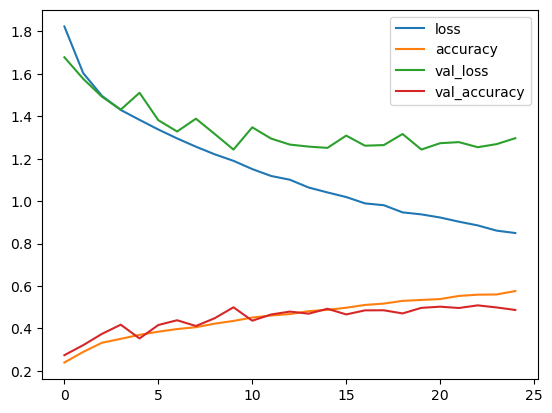

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(h1.history).plot()
plt.show()

In [ ]:
model.save('model_3cnn64b30e32dense_weight'  + '.h5')

In [19]:
prob= model.predict(x_unseen)

180/180 [==============================] - 4s 18ms/step


In [20]:
pre_label = np.argmax(prob,axis=1)

In [21]:
import os
import glob

img_dir = r"C:\Users\hp\ImgClass_Fashion\image-classification-pants\test"  
extensions = ['*.jpg', '*.jpeg', '*.png']  

image_files = []
for extension in extensions:
    image_files.extend(glob.glob(os.path.join(img_dir, extension)))

# Extract just the file names without the path
image_files = [os.path.basename(f) for f in image_files]

print(image_files[:5])

['Image_test_00001.jpg', 'Image_test_00002.jpg', 'Image_test_00003.jpg', 'Image_test_00004.jpg', 'Image_test_00005.jpg']


In [22]:
import csv
with open('weights_labels.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['file_name', 'label'])
    for i in range(len(image_files)):
        writer.writerow([image_files[i], pre_label[i]])